# Guided Project: Visualizing Earnings Based On College Majors

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. 

The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. 

FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.

Some questions we wish to answer are:

- Do students in more popular majors make more money?
    - Using scatter plots
- How many majors are predominantly male? Predominantly female?
    - Using histograms
- Which category of majors have the most students?
    - Using bar plots

#### First, lets import the libraries we'll need:

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Run the Jupyter magic %matplotlib inline so that plots are displayed inline.

In [61]:
%matplotlib inline

#### Read the dataset into a DataFrame and start exploring the data. 

Read in the csv file

In [62]:
recent_grads = pd.read_csv("recent-grads.csv")

recent_grads

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


Check how many rows there are

In [63]:
recent_grads.shape

(173, 21)

Check for null values

In [64]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

As there are very few null values delete rows with null values straight away

In [65]:
recent_grads = recent_grads.dropna()

recent_grads.shape

(172, 21)

Lets start exploring by using a scatter plots to test correlation between different columns

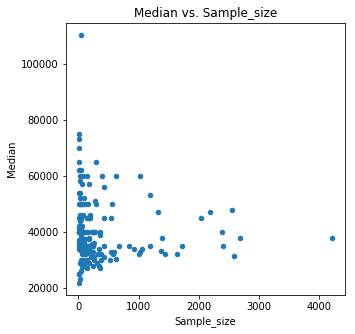

In [66]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Median vs. Sample_size', figsize=(5,5))

This plot seems to illustrate that as sample size increases, the variability of median salary observations decreases. Another observation is that the majors with the highest median salaries tend to have small sample sizes.

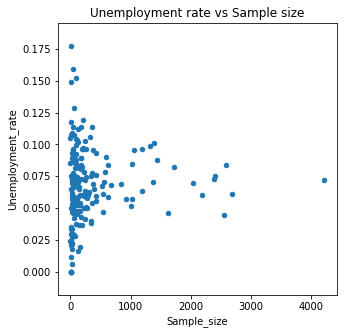

In [67]:
recent_grads.plot(x="Sample_size", y="Unemployment_rate",
                  kind="scatter",title="Unemployment rate vs Sample size",figsize=(5,5))

Once again the plot seems to indicate that the variability on Unemployment Rate decreases as Sample Size increases.

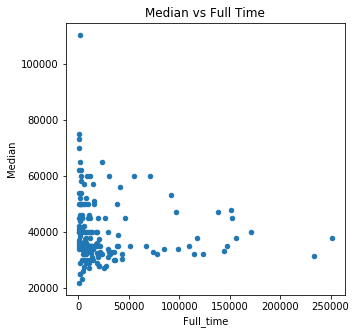

In [68]:
recent_grads.plot(x="Full_time", y="Median", kind="scatter", title="Median vs Full Time", figsize=(5,5))

This plot is practically the same as the Median vs Sample Size plot and thus it is likely that most of these majors produce full time workers.

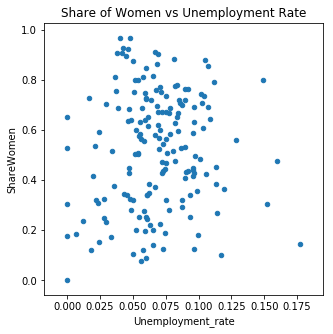

In [69]:
recent_grads.plot(x="Unemployment_rate", y="ShareWomen", kind="scatter", title="Share of Women vs Unemployment Rate", figsize=(5,5))

There does not seem to be any correlation between the share of women and the unemployment rate.

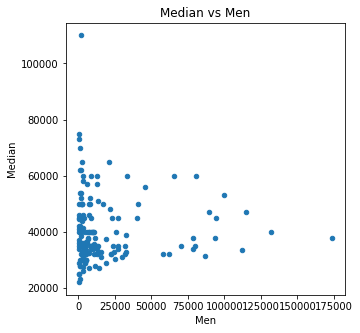

In [70]:
recent_grads.plot(x="Men", y="Median", kind="scatter", title="Median vs Men", figsize=(5,5))

When compared to the median vs sample size it seems that in general the median salary is higher for men than for the sample population and thus the median for men is higher than the median for women is some majors.

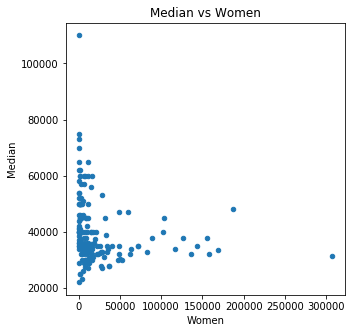

In [71]:
recent_grads.plot(x="Women", y="Median", kind="scatter", title="Median vs Women", figsize=(5,5))

This plot confirms the observations made regarding the previous chart.

#### We will now explore the values in some of the columns

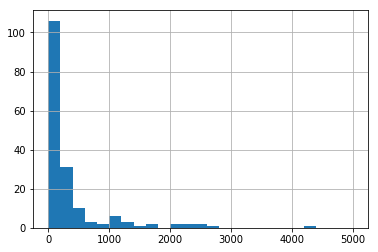

In [72]:
recent_grads["Sample_size"].hist(bins=25, range =(0,5000))

It seems the majority of the majors have sample sizes of below 500 which is a small sample size.

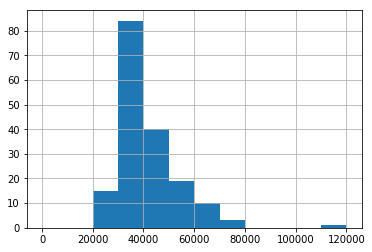

In [73]:
recent_grads["Median"].hist(bins=12, range=(0,120000))

It seems that the majority of majors have median salaries between 30k and 50k with only one or two being above 100k.

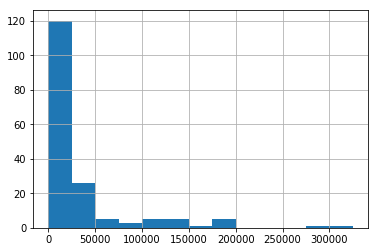

In [74]:
recent_grads["Employed"].hist(bins=13,range=(0,325000))

The emplyed figure is very similar to the sample size figure indicating that a reasonably similar share of each major are employed.

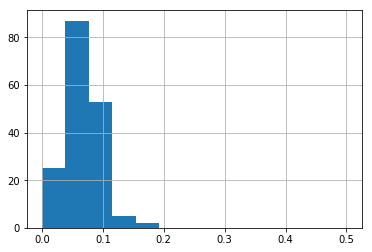

In [75]:
recent_grads["Unemployment_rate"].hist(bins=13,range=(0,0.5))

The above chart indicates that the uemployment rate for all majors is below the national average with none having an unemployment rate above 0.2%. This is in line with the previous chart.

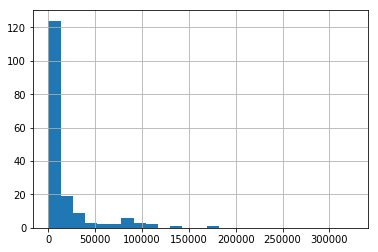

In [76]:
recent_grads["Men"].hist(bins=25, range=(0,325000))

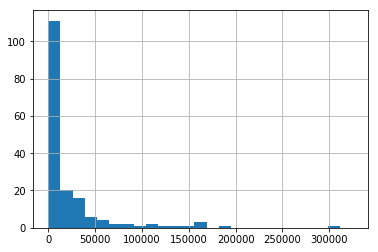

In [77]:
recent_grads["Women"].hist(bins=25, range=(0,325000))

As per the above two charts it seems that there are a fre majors with many women but men tend to stick to majors with fewer men.

We will now import the pandas.plotting module to gin access to .scatter_matrix()

In [78]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ab93c18>,
      dtype=object)

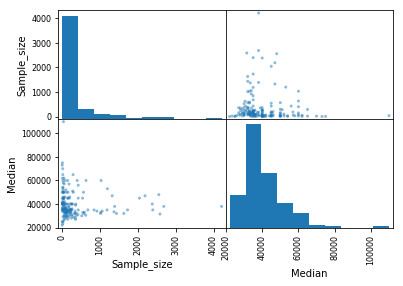

In [79]:
scatter_matrix(recent_grads[["Sample_size", "Median"]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b87b278>,
      dtype=object)

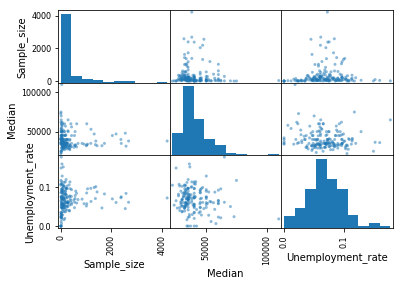

In [80]:
scatter_matrix(recent_grads[["Sample_size","Median","Unemployment_rate"]])

Lets explore the share of women in a sample of majors

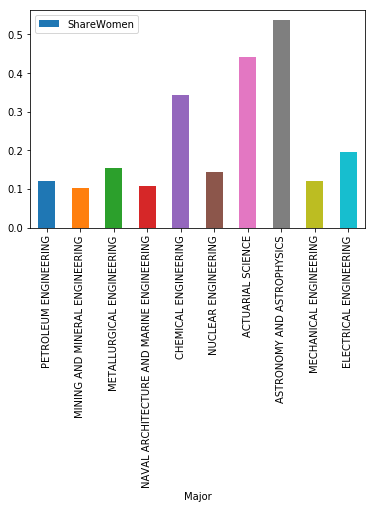

In [81]:
recent_grads[:10].plot(x="Major",y="ShareWomen", kind="bar")

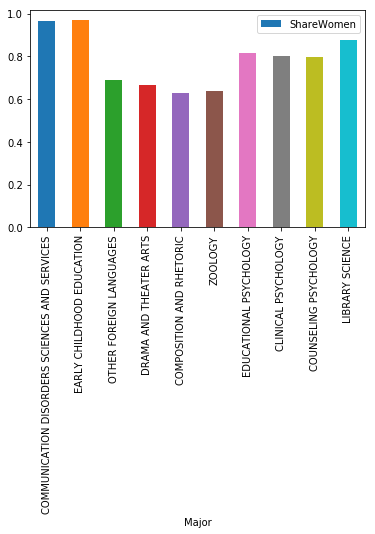

In [82]:
recent_grads[-10:].plot(x="Major",y="ShareWomen", kind="bar")

A quick exploration of the data set shows that the dataset is ordered by Median salary with the highest medians being at the top and the lowest at the bottom.

The two charts above seem to indicate that every major in the bottom 10 majors by median have a higher percentage of women than the top 10 majors.

Now lets explore the unemployment rate for the top 10 and bottom 10 majors by median salary

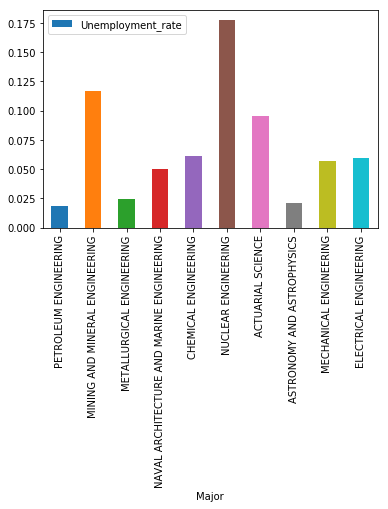

In [86]:
recent_grads[:10].plot(x="Major",y="Unemployment_rate", kind="bar")

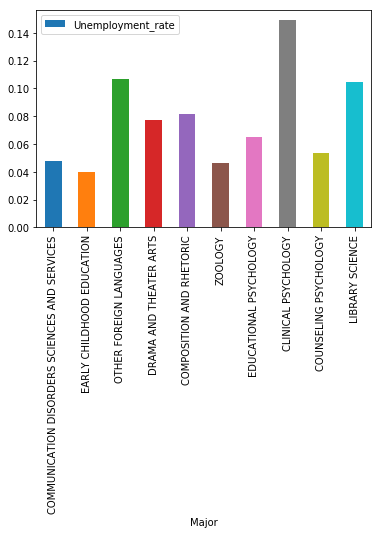

In [85]:
recent_grads[-10:].plot(x="Major",y="Unemployment_rate", kind="bar")

From the above two charts it seems that median salary does not have much in common with the unemployment rate but rather the unemployment rate is linked to the feild of each major.